<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X, y = make_moons(n_samples=500, noise=0.10, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

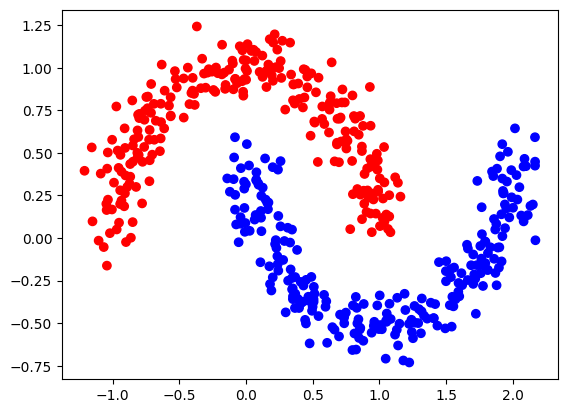

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap = 'bwr_r')

In [ ]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()

    self.l1 = nn.Linear(2, 2)
    self.l2 = nn.Linear(2, 1)

  def forward(self, X):
    out = self.l1(X)
    out = torch.relu(out)

    out = self.l2(out)
    out = torch.sigmoid(out)
    return out


In [ ]:
model = ANN()



In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2781, -0.2739],
         [ 0.3705, -0.1174]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6372, -0.4337], requires_grad=True),
 Parameter containing:
 tensor([[0.3294, 0.4231]], requires_grad=True),
 Parameter containing:
 tensor([-0.6180], requires_grad=True)]

In [ ]:
params= list(model.parameters())
n1_w = params[0].data[0]
n1_b = params[1].data[0]

n2_w = params[0].data[1]
n2_b = params[1].data[1]

n3_w = params[2].data[0]
n3_b = params[3].data

In [ ]:

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for i in range(3000):
  y_hat = model(X_train)
  loss = criterion(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i%100 == 0:
    print(loss.item())

0.7143164873123169
0.4198761582374573
0.3320716619491577
0.29102590680122375
0.27025318145751953
0.2588149905204773
0.25137534737586975
0.2458185851573944
0.24154168367385864
0.23785552382469177
0.23467878997325897
0.23168832063674927
0.22898301482200623
0.22647015750408173
0.2241145372390747
0.2220514565706253
0.22019930183887482
0.2185782492160797
0.21716079115867615
0.21595849096775055
0.2148677408695221
0.21392439305782318
0.21308884024620056
0.21237675845623016
0.2117558717727661
0.21117277443408966
0.21062986552715302
0.21016563475131989
0.20976172387599945
0.2093953639268875


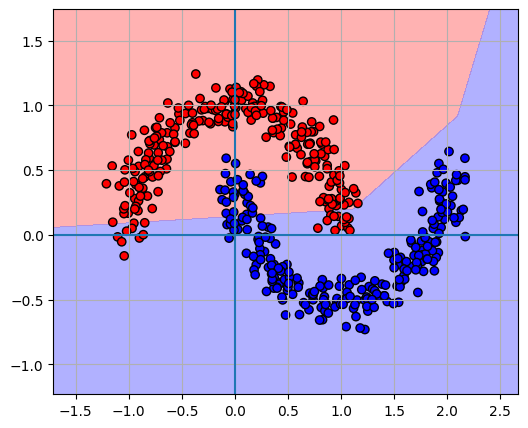

In [ ]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

with torch.no_grad():
  grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])
  Z = model(grid)
  Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

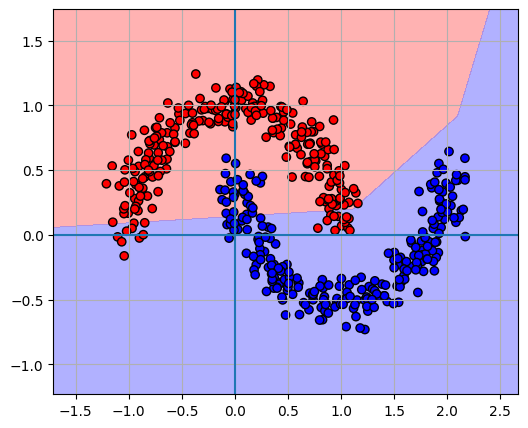

In [ ]:
def neuron(X):
    z1 = X @ n1_w.T + n1_b
    o1 = torch.relu(z1).reshape(-1,1)

    z2 = X @ n2_w.T + n2_b
    o2 = torch.relu(z2).reshape(-1,1)
    o = torch.cat((o1, o2), dim=1)


    z3 = o @ n3_w.T + n3_b
    o3 = torch.sigmoid(z3)
    return o3


x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

with torch.no_grad():
  grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])
  Z = neuron(grid)
  Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()